# Student Performance Analysis

## 📌 Project Overview
This project analyzes various factors affecting student performance, using statistical and machine learning techniques. The dataset contains information on study habits, motivation levels, and exam scores. The goal is to identify key factors influencing students' academic success and build predictive models.

## 📊 Data Exploration
- **Dataset**: `StudentPerformanceFactors.csv`
- **Key Features**:
  - `Hours_Studied`: Study hours per week
  - `Motivation_Level`: Self-reported motivation level
  - `Exam_Score`: Final exam score
  
### Exploratory Data Analysis (EDA)
- Statistical summary and data distribution visualization.
- Identification of missing values and outliers.
- Correlation analysis to find relationships between variables.

## 🛠 Data Preprocessing
- Handling missing values by replacing them with the mean.
- Encoding categorical variables.
- Scaling numerical data using `StandardScaler`.

## 🤖 Machine Learning Models
### Models Implemented:
1. **Linear Regression**: For predicting exam scores based on study habits.
2. **Random Forest Regressor**: A more robust model for handling nonlinear relationships.
3. **Gradient Boosting & XGBoost**: Advanced models for better predictive accuracy.

### Model Evaluation Metrics:
- **Mean Absolute Error (MAE)**
- **Mean Squared Error (MSE)**
- **Root Mean Squared Error (RMSE)**
- **R² Score** (Goodness of fit)

## 🔍 Key Findings
- Strong correlation found between `Hours_Studied` and `Exam_Score`.
- Motivation level also plays a significant role in student performance.
- **Linear Regression provided the best predictive accuracy** in this analysis.
- **Random Forest performed worse than expected**, indicating it may not be the best choice for this dataset.

## 📁 Project Structure
```
├── StudentPerformanceFactors.csv  # Dataset
├── student_performance_analysis.py  # Main script
├── README.md  # Project documentation
├── requirements.txt  # Required Python packages
└── notebook.ipynb  # Jupyter Notebook (optional)
```

## 🚀 How to Use
### 1️⃣ Install Dependencies
```bash
pip install -r requirements.txt
```
### 2️⃣ Run the Analysis
```bash
python student_performance_analysis.py
```

## 📌 Future Improvements
- Add more features such as sleep patterns and extracurricular activities.
- Implement deep learning models for enhanced predictions.
- Optimize hyperparameters of Random Forest to improve performance.

## 📜 License
This project is open-source and available for educational purposes.

---
💡 **Contributions and feedback are welcome!** Feel free to fork the repo and improve the analysis. 🚀



In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor


In [47]:
# Load the dataset
df = pd.read_csv("/kaggle/input/student-performance-factors/StudentPerformanceFactors.csv")



In [48]:
# Display sample data
display(df.sample(5))



,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
3555,20,93,Medium,High,No,10,97,Medium,Yes,1,Low,Medium,Public,Neutral,2,No,Postgraduate,Moderate,Male,71
3435,25,72,Medium,Medium,Yes,8,87,Low,Yes,3,Medium,Low,Public,Positive,3,No,Postgraduate,Moderate,Male,68
2256,25,96,Low,Medium,No,9,72,Low,Yes,0,Low,Medium,Private,Positive,3,No,High School,Near,Male,69
2381,14,88,Medium,Medium,Yes,7,66,Medium,Yes,4,Medium,High,Public,Positive,3,No,High School,Near,Female,69
2362,11,82,Low,Low,No,6,61,Low,Yes,2,Medium,Medium,Public,Neutral,2,No,High School,Near,Female,61


In [49]:
# Basic information about the dataset
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [50]:
# Statistical summary
display(df.describe())



,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [51]:
# Checking for missing values
missing_values = df.isnull().sum()
print("Missing Values per Column:\n", missing_values)



Missing Values per Column:
 Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64


In [52]:
# Handling missing values by replacing them with column means
for column in df.columns:
    if df[column].dtype != 'object':
        df[column].fillna(df[column].mean(), inplace=True)



<ipython-input-52-8969bab5cdd4>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)


In [53]:
# Convert categorical data into numerical if necessary
df = pd.get_dummies(df, drop_first=True)

display(df.sample(5))



,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score,Parental_Involvement_Low,Parental_Involvement_Medium,Access_to_Resources_Low,...,Teacher_Quality_Medium,School_Type_Public,Peer_Influence_Neutral,Peer_Influence_Positive,Learning_Disabilities_Yes,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate,Distance_from_Home_Moderate,Distance_from_Home_Near,Gender_Male
5806,6,66,7,62,2,4,61,False,False,False,...,True,True,True,False,False,False,True,False,True,True
4010,20,90,8,97,1,2,68,False,True,True,...,False,False,True,False,False,True,False,False,True,False
5323,21,65,8,67,1,4,64,False,True,False,...,False,True,False,True,False,True,False,False,True,False
3643,20,82,5,80,3,1,68,False,False,False,...,True,True,True,False,True,False,False,False,True,False
41,21,84,6,52,1,2,65,False,True,False,...,False,True,True,False,True,False,False,False,False,False


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

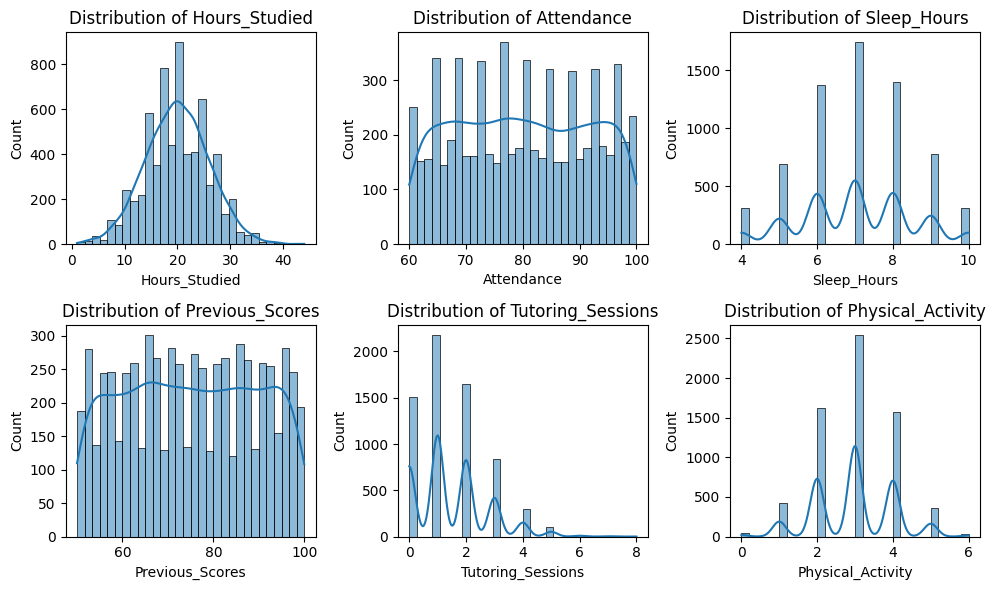

In [54]:
# Exploratory Data Analysis (EDA)
## Distribution of numerical features
numeric_columns = df.select_dtypes(include=['number']).columns
plt.figure(figsize=(10, 6))
for i, col in enumerate(numeric_columns, 1):
    if i > 6:
        break  # Limiting the number of plots to avoid overcrowding
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


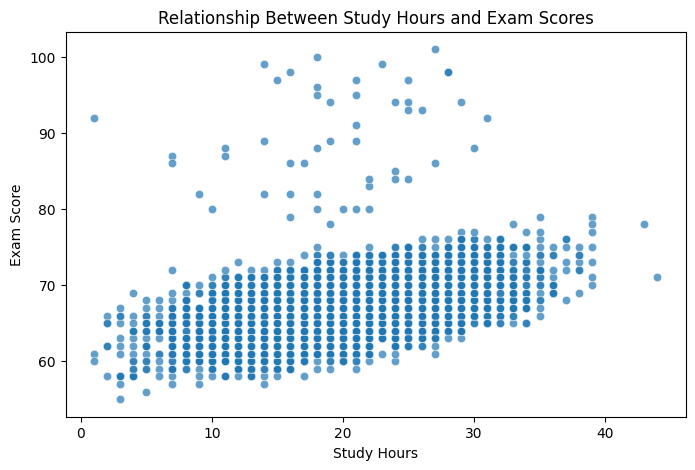

In [55]:
## Relationship between study hours and exam scores
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Hours_Studied"], y=df["Exam_Score"], alpha=0.7)
plt.title("Relationship Between Study Hours and Exam Scores")
plt.xlabel("Study Hours")
plt.ylabel("Exam Score")
plt.show()

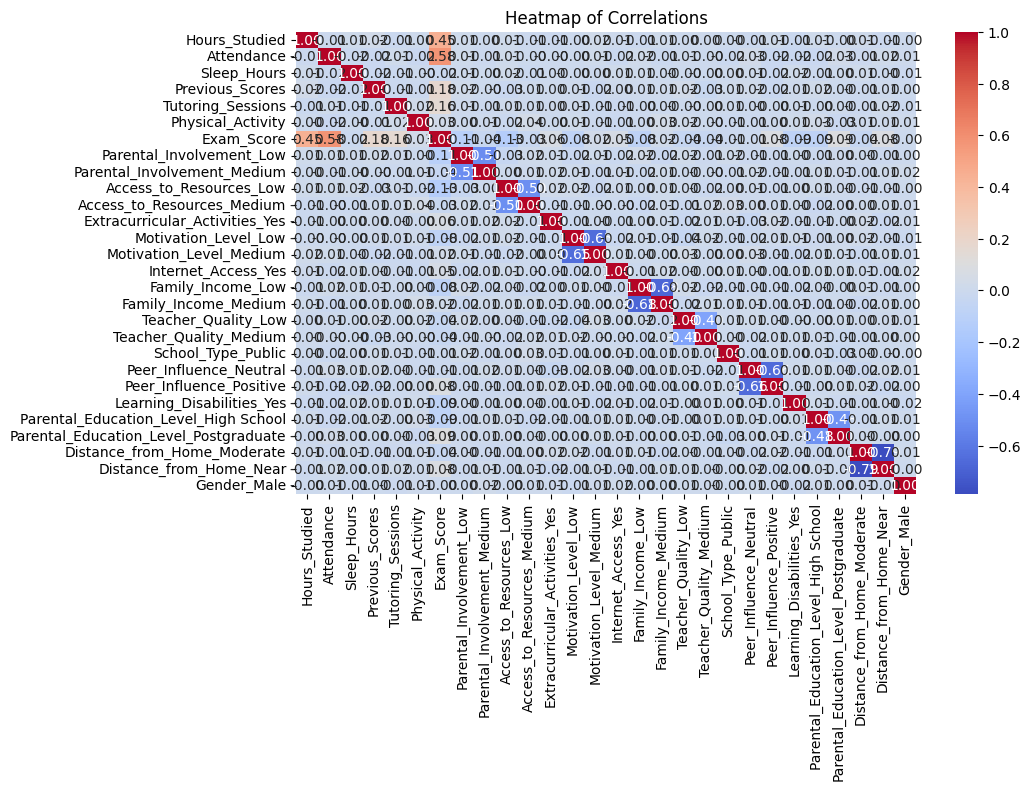

In [56]:
## Correlation analysis
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Correlations')
plt.show()


In [57]:
## Most influential factors for exam performance
correlations = df.corr()['Exam_Score'].sort_values(ascending=False)
print("Most influential factors:\n", correlations)

Most influential factors:
 Exam_Score                               1.000000
Attendance                               0.581072
Hours_Studied                            0.445455
Previous_Scores                          0.175079
Tutoring_Sessions                        0.156525
Parental_Education_Level_Postgraduate    0.093764
Distance_from_Home_Near                  0.084870
Peer_Influence_Positive                  0.081217
Extracurricular_Activities_Yes           0.064382
Internet_Access_Yes                      0.051475
Physical_Activity                        0.027824
Motivation_Level_Medium                  0.024771
Family_Income_Medium                     0.020995
Gender_Male                             -0.002032
Peer_Influence_Neutral                  -0.007795
School_Type_Public                      -0.008844
Sleep_Hours                             -0.017022
Access_to_Resources_Medium              -0.026158
Parental_Involvement_Medium             -0.035978
Teacher_Quality_Medium 

In [58]:
# Splitting data into features (X) and target variable (y)
y = df['Exam_Score']
X = df.drop(columns=['Exam_Score'])


In [59]:
# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [60]:
# Scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [61]:
# Model Training
## Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

In [62]:
## Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

In [63]:
## Additional Models
models = {
    'Gradient Boosting': GradientBoostingRegressor(),
    'XGBoost': XGBRegressor()
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    results[name] = mse
    print(f"{name} MSE: {mse}")



Gradient Boosting MSE: 3.8081792469402553
XGBoost MSE: 4.63012542098525


In [64]:
# Model Evaluation
## Linear Regression
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f'Linear Regression MAE: {mae_lr}')
print(f'Linear Regression MSE: {mse_lr}')
print(f'Linear Regression RMSE: {rmse_lr}')
print(f'Linear Regression R2 Score: {r2_lr}')



Linear Regression MAE: 0.4502854154700944
Linear Regression MSE: 3.256695866435406
Linear Regression RMSE: 1.8046317813990216
Linear Regression R2 Score: 0.7696017567194431


In [65]:
## Random Forest
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f'Random Forest MAE: {mae_rf}')
print(f'Random Forest MSE: {mse_rf}')
print(f'Random Forest RMSE: {rmse_rf}')
print(f'Random Forest R2 Score: {r2_rf}')



Random Forest MAE: 1.1745461422087746
Random Forest MSE: 4.94186860816944
Random Forest RMSE: 2.2230314006260548
Random Forest R2 Score: 0.6503825065213062


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


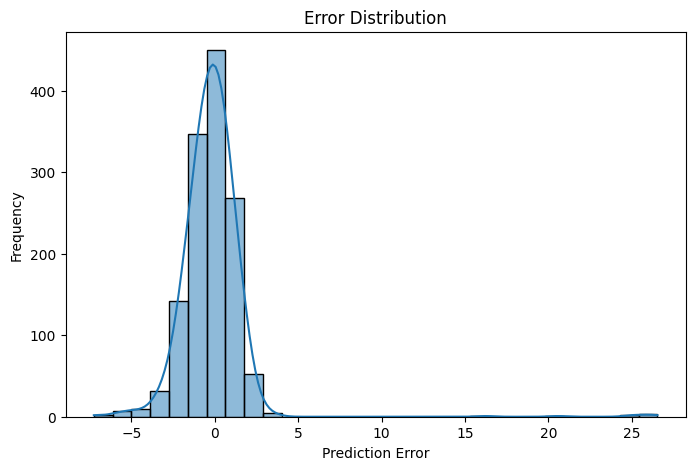

In [66]:
# Error Distribution
errors = y_test - rf_model.predict(X_test)
plt.figure(figsize=(8, 5))
sns.histplot(errors, bins=30, kde=True)
plt.title("Error Distribution")
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.show()



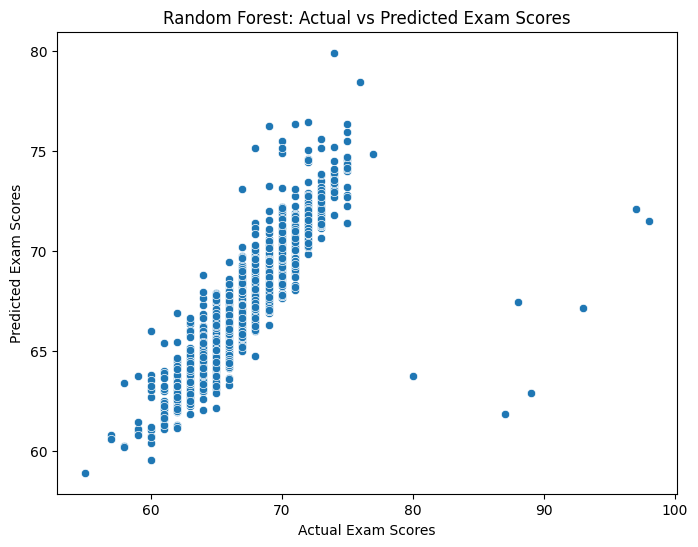

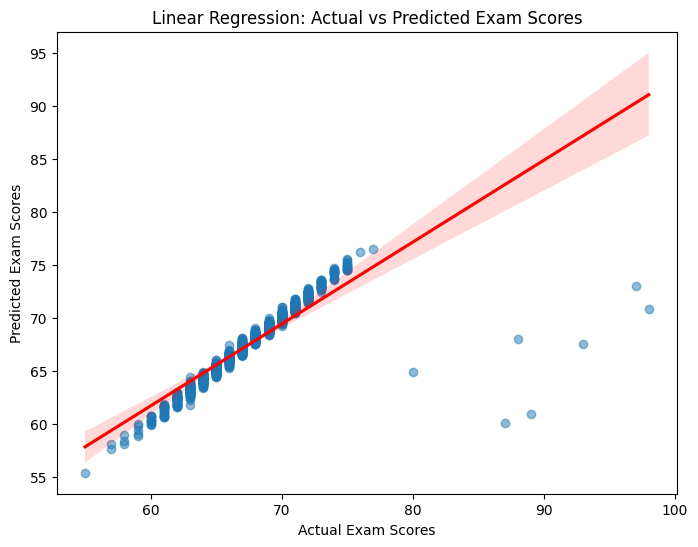

In [67]:
# Visualizing model performance
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.xlabel('Actual Exam Scores')
plt.ylabel('Predicted Exam Scores')
plt.title('Random Forest: Actual vs Predicted Exam Scores')
plt.show()

plt.figure(figsize=(8,6))
sns.regplot(x=y_test, y=y_pred_lr, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.xlabel('Actual Exam Scores')
plt.ylabel('Predicted Exam Scores')
plt.title('Linear Regression: Actual vs Predicted Exam Scores')
plt.show()